In [1]:
import matplotlib.pyplot as plt
import simulated_parameter_vault
import simulated_pulse_sequence

# Single-ion Rabi flopping

In [2]:
simulated_parameter_vault.set_parameter(["IonsOnCamera", "ion_number"], 1)
simulated_parameter_vault.set_parameter(["StateReadout", "readout_mode"], "pmt")

In [3]:
rabi_result = simulated_pulse_sequence.run_simulation(
    "sequences/rabi_flopping.py",
    "RabiFlopping",
    {
        "RabiFlopping-Scan_Selection": "RabiFlopping.duration",
        "RabiFlopping:RabiFlopping.duration": {
            "ty": "RangeScan",
            "start": 0,
            "stop": 10e-6,
            "npoints": 50
        },
    },
)

Parameters written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_params_RabiFlopping.txt

2244781.2384122014
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_pulses_RabiFlopping_0.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_lasers_RabiFlopping_0.txt
Calling IonSim with num_ions=1, RabiFlopping.duration=0.0

2244781.2384122014
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_pulses_RabiFlopping_1.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_lasers_RabiFlopping_1.txt
Calling IonSim with num_ions=1, RabiFlopping.duration=2.0408163265306124e-07

2244781.2384122014
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_pulses_RabiFlopping_2.txt
Laser s

2244781.2384122014
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_pulses_RabiFlopping_24.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_lasers_RabiFlopping_24.txt
Calling IonSim with num_ions=1, RabiFlopping.duration=4.897959183673469e-06

2244781.2384122014
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_pulses_RabiFlopping_25.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_lasers_RabiFlopping_25.txt
Calling IonSim with num_ions=1, RabiFlopping.duration=5.102040816326531e-06

2244781.2384122014
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_pulses_RabiFlopping_26.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\RabiFlopping\1608_48_lasers

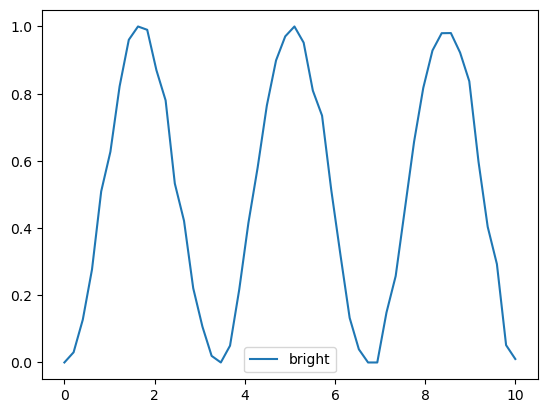

In [10]:
x = rabi_result['RabiFlopping']['x'] * 1e6
y = rabi_result['RabiFlopping']['y'][0]

plt.plot(x, y, label='bright')
plt.legend()
plt.show()

In [4]:
print(rabi_result)

{'RabiFlopping': {'x': array([0.00000000e+00, 2.04081633e-07, 4.08163265e-07, 6.12244898e-07,
       8.16326531e-07, 1.02040816e-06, 1.22448980e-06, 1.42857143e-06,
       1.63265306e-06, 1.83673469e-06, 2.04081633e-06, 2.24489796e-06,
       2.44897959e-06, 2.65306122e-06, 2.85714286e-06, 3.06122449e-06,
       3.26530612e-06, 3.46938776e-06, 3.67346939e-06, 3.87755102e-06,
       4.08163265e-06, 4.28571429e-06, 4.48979592e-06, 4.69387755e-06,
       4.89795918e-06, 5.10204082e-06, 5.30612245e-06, 5.51020408e-06,
       5.71428571e-06, 5.91836735e-06, 6.12244898e-06, 6.32653061e-06,
       6.53061224e-06, 6.73469388e-06, 6.93877551e-06, 7.14285714e-06,
       7.34693878e-06, 7.55102041e-06, 7.75510204e-06, 7.95918367e-06,
       8.16326531e-06, 8.36734694e-06, 8.57142857e-06, 8.77551020e-06,
       8.97959184e-06, 9.18367347e-06, 9.38775510e-06, 9.59183673e-06,
       9.79591837e-06, 1.00000000e-05]), 'y': [array([0.        , 0.03030303, 0.12745098, 0.27678571, 0.50925926,
       0.62

# Two-ion MS gate

In [6]:
simulated_parameter_vault.set_parameter(["IonsOnCamera", "ion_number"], 2)
simulated_parameter_vault.set_parameter(["StateReadout", "readout_mode"], "camera_states")

simulated_parameter_vault.set_parameter(["MolmerSorensen", "detuning"], -8e3)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "detuning_carrier_1"], 1e3)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "bichro_enable"], True)

In [7]:
ms_result = simulated_pulse_sequence.run_simulation(
    "sequences/molmer_sorensen.py",
    "MolmerSorensenGate",
    {
        "MolmerSorensen-Scan_Selection": "MolmerSorensen.duration",
        "MolmerSorensen:MolmerSorensen.duration": {
            "ty": "RangeScan",
            "start": 0,
            "stop": 100e-6,
            "npoints": 30
        },
    },
)

Parameters written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_params_MolmerSorensen.txt
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_pulses_MolmerSorensen_0.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_lasers_MolmerSorensen_0.txt
Calling IonSim with num_ions=2, MolmerSorensen.duration=0.0
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_pulses_MolmerSorensen_1.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_lasers_MolmerSorensen_1.txt
Calling IonSim with num_ions=2, MolmerSorensen.duration=3.448275862068966e-06
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_pulses_MolmerSorensen_2.txt
Laser sequence w

Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_pulses_MolmerSorensen_24.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_lasers_MolmerSorensen_24.txt
Calling IonSim with num_ions=2, MolmerSorensen.duration=8.275862068965519e-05
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_pulses_MolmerSorensen_25.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_lasers_MolmerSorensen_25.txt
Calling IonSim with num_ions=2, MolmerSorensen.duration=8.620689655172414e-05
Pulse sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_pulses_MolmerSorensen_26.txt
Laser sequence written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-21\MolmerSorensenGate\1610_09_lasers_MolmerSo

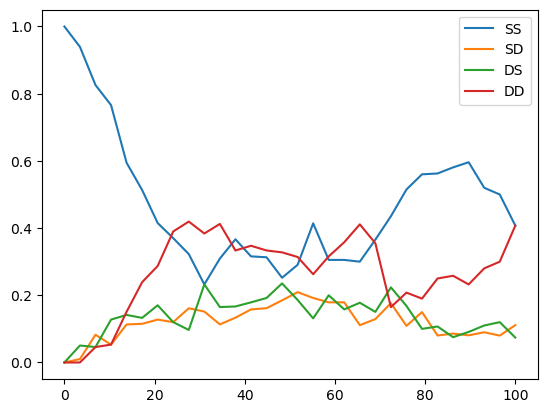

In [8]:
x = ms_result['MolmerSorensen']['x'] * 1e6
ds = ms_result['MolmerSorensen']['y'][0]
ss = ms_result['MolmerSorensen']['y'][1]
sd = ms_result['MolmerSorensen']['y'][2]
dd = ms_result['MolmerSorensen']['y'][3]

plt.plot(x, ss, label='SS')
plt.plot(x, sd, label='SD')
plt.plot(x, ds, label='DS')
plt.plot(x, dd, label='DD')
plt.legend()
plt.show()

In [9]:
print(ms_result)

{'RabiFlopping': {'x': [], 'y': []}, 'MolmerSorensen': {'x': array([0.00000000e+00, 3.44827586e-06, 6.89655172e-06, 1.03448276e-05,
       1.37931034e-05, 1.72413793e-05, 2.06896552e-05, 2.41379310e-05,
       2.75862069e-05, 3.10344828e-05, 3.44827586e-05, 3.79310345e-05,
       4.13793103e-05, 4.48275862e-05, 4.82758621e-05, 5.17241379e-05,
       5.51724138e-05, 5.86206897e-05, 6.20689655e-05, 6.55172414e-05,
       6.89655172e-05, 7.24137931e-05, 7.58620690e-05, 7.93103448e-05,
       8.27586207e-05, 8.62068966e-05, 8.96551724e-05, 9.31034483e-05,
       9.65517241e-05, 1.00000000e-04]), 'y': [array([0.        , 0.05050505, 0.04587156, 0.12765957, 0.14150943,
       0.13274336, 0.17021277, 0.12      , 0.09677419, 0.23232323,
       0.16494845, 0.16666667, 0.17894737, 0.19191919, 0.23529412,
       0.18604651, 0.13131313, 0.2       , 0.15789474, 0.17777778,
       0.15053763, 0.22352941, 0.16831683, 0.1       , 0.10714286,
       0.07526882, 0.09090909, 0.11      , 0.12      , 0.074